## 3 Keras and Tensorflow

3.1 텐서플로란? <br>
3.2 케라스란? <br>
3.3 케라스와 텐서플로의 간략한 역사 <br>
3.4 딥러닝 작업 환경 설정하기 <br>
3.5 텐서플로 시작하기 <br>
3.6 신경망의 구조: 핵심 Keras API 이해하기 <br>
3.7 요약 <br>

### 3.1 텐서플로란?

무료오픈소스머신러닝플랫폼

### 3.2 케라스란?

딥러닝 개발: 층, 모델, 옵티마이저, 손실, 측정 지표 등 <br>
TensorFlow(인프라): 텐서, 변수, 자동 미분, 분산등 <br>
하드웨어 실행

### 3.3 케라스와 텐서플로의 간략한 역사

그렇데요

### 3.4 딥러닝 작언 환경 설정하기

#### 3.4.1 주피터 노트북
#### 3.4.2 코랩
GPU 런타임 사용가능

#### 3.5 텐서플로 시작하기

1. 저수준의 텐서 연산 가능 <br>
    - 덧셈, relu, matmul같은 텐서연산 <br>
    - gradient를 계산하는 방법인 역전파(텐서플로의 GradientTape 객체를 통해 처리됨)
2. 고수준 딥러닝 개념, 이는 Keras API로 변환
    - 모델을 구성하는 <b>층</b> <br>
    - 학습에 사용하는 피드백 신호를 정의하는 <b>손실함수</b> <br>
    - 학습진행방법을 결정하는 <b>옵티마이저</b> <br>
    - 정확도처럼 모델의 성능을 평가하는 <b>측정지표</b> <br>
    - 미니 배치 확률적 경사 하강법을 수행하는 <b>훈련루프</b> <br>
    
#### 3.5.1 상수 텐서와 변수
#### 코드 3-1 모두 1또는 0인 텐서

In [3]:
import tensorflow as tf

x1 = tf.ones(shape=(2,1))  # np.ones(shape=(2,1))과 동일
print(x1)

x2 = tf.zeros(shape=(2,1)) # np.zeros(shape=(2,1))과 동일
print(x2)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


#### 코드 3-2 랜덤 텐서

In [4]:
x1 = tf.random.normal(shape=(3,1), mean=0., stddev=1.)
# 평균이 0이고 표편이 1인 정규분포(normal distribution)에서 뽑은 랜덤한 값으로 만든 텐서. 
print(x1)  # np.random.normal(size=(3,1), loc=0., scale=1.)과 같음

x2 = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
# 0과 1사이의 균등분포(uniform distribution)에서 뽑은 랜덤한 값으로 만든 텐서.
print(x2) # np.random.uniform(size=(3,1), low=0., high=1.)과 같음

tf.Tensor(
[[ 1.0854167 ]
 [-0.8479837 ]
 [ 0.18908162]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.03751421]
 [0.10825074]
 [0.8742385 ]], shape=(3, 1), dtype=float32)


#### 코드 3-3 넘파이 배열에 값 할당하기

In [5]:
import numpy as np

x = np.ones(shape=(2,2))
x[0,0] = 0.

#### 코드 3-4 텐서플로 텐서에 값을 할당하지 못함

In [6]:
x = tf.ones(shape=(2,2))
x[0,0] = 0. 
# 텐서에는 값을 할당할 수 없기 떄문에 에러가 발생
# 따라서 이런 값들을 '변수'에 저장함

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

#### 코드 3-5 텐서플로 변수 만들기 

In [9]:
v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.5878663 ],
       [0.72772795],
       [0.06780359]], dtype=float32)>


#### 코드 3-6 텐서플로 변수에 값 할당하기

In [11]:
# assign으로 수정 가능 
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

#### 코드 3-7 변수 일부에 값 할당하기 

In [12]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

#### 코드 3-8 assign_add() 사용하기 

In [15]:
v.assign_add(tf.ones((3,1)))

# assign_add()와 assign_sub()은 각각 +=, -=와 동일

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### 3.5.2 텐서 연산: 텐서플로에서 수학 계산하기

#### 코드 3-9 기본적인 수학 연산

In [17]:
a = tf.ones((2,2))
b = tf.square(a)  # 제곱을 계산
c = tf.sqrt(a) # 제곱근을 계산
d = b+c # 두 텐서를 더한다(원소별 연산)
e = tf.matmul(a, b)  # 두 텐서의 점곱을 계산
e *= d  # 두 텐서를 곱함(원소별 연산)

# 앞의 연산이 모두 바로 실행된다

#### 3.5.3 GradientTape API 다시 살펴보기

#### 코드 3-10 GradientTape 사용

In [18]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)  # 가중치에 대한 모델 손실의 gradient를 계산하는데 가장 널리 사용되는 방법

#### 코드 3-11 상수 텐서 입력과 함께 GradientTape 사용하기

In [20]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

#### 코드 3-12 Gradient를 Tape로 중첩하여 이계도 gradient 계산하기

물체의 위치의 gradient는 속도, second-order, 여시거는 중첩된 gradient는 가속도

In [8]:
import tensorflow as tf
time1 = tf.Variable(0.)
print(time1)

with tf.GradientTape() as inner_tape:
    position = 4.9*time1**2
speed = inner_tape.gradient(position, time1)
print(speed)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
tf.Tensor(0.0, shape=(), dtype=float32)


In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9*time**2
    speed = inner_tape.gradient(position, time)
    print("1st speed:", speed)
acceleration = outer_tape.gradient(speed, time) # 바깥쪽 테이프가 안쪽 테이프의 gradient를 계산, 계산된 가속도는 4.9*2 = 9.8
print("2st speed:", speed)
print(acceleration)

1st speed: tf.Tensor(0.0, shape=(), dtype=float32)
2st speed: tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


#### 3.5.4 end-to-end 예제: 텐서플로 선형 분류기 

텐서플로 선형분류기: 선형적으로 잘 구분되는 합성 데이터를 만든다고 할때, 
- 2D 평면의 포인트로 2개의 클래스를 가지게 만든다. <br>
- 평균과 공분산 행렬(covariance matrix)를 가진 랜덤한 분포에서 좌표값을 뽑아 각 클래스의 포인트를 생성 <br>

#### 코드 3-13 2D 평면에 두 클래스의 랜덤한 포인트 생성하기

In [28]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

#### 코드 3-14 두 클래스를 (2000, 2) 크기의 한 배열로 쌓기

In [29]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

#### 코드 3-15 (0과 1로 구성된) 타깃 생성하기

In [30]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                      np.ones((num_samples_per_class, 1), dtype="float32")))

#### 코드 3-16 두 클래스의 포인트를 그래프로 그리기 (그림 3-6)

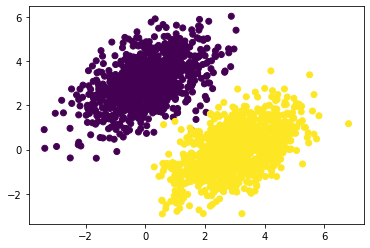

In [31]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

# 아핀 변환(prediction = W•input +b)
# 예측과 타깃 사이의 차이를 제곱한 값을 최소화하도록 훈련

#### 코드 3-17 선형 분류기의 변수 만들기

In [32]:
input_dim = 2  # 입력은 2D포인트
output_dim = 1  # 출력 예측은 샘플당 하나의 점수(0에 가까우면 샘플을 클래스 0으로 예측하고, 1에 가까우면 클래스1 로 예측)
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim)))

#### 코드 3-18 정방향 패스 함수

In [33]:
def model(inputs):
    return tf.matmul(inputs, W)+b
# W = [[w1], [w2]], 반면 b는 하나으 스칼라 값
# prediction = [[w1], [w2] • [x, y]+b] = w1*x + w2*y+b

#### 코드 3-19 평균 제곱 오차 손실 함수

In [34]:
def square_loss(targets, predictions):  # per_sample_losses는 targets나 predictions와 크기가 같은 텐서이며 각 샘플의 손실 값을 담고 있다.
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses)  # 샘플당 손실 값을 하나의 스칼라 손실 값으로 평균, reduce_mean 함수가 이런 작업을 수행

#### 코드 3-20 훈련 스텝 함수

In [35]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions) # gradientTape 블록 안의 정방향 패스
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])  # 가중치에 대한 손실의 gradient를 구함
    W.assign_sub(grad_loss_wrt_W*learning_rate)  # 가중치를 업데이트
    b.assign_sub(grad_loss_wrt_b*learning_rate)
    return loss

#### 코드 3-21 배치 훈련 루프

In [39]:
for step in range(41):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")
    
    
# 40번째 epoch에서 0.25로 안정화됨, 40번째 epoch 보려고 range를 41로 잡음

0번째 스텝의 손실: 0.0250
1번째 스텝의 손실: 0.0250
2번째 스텝의 손실: 0.0250
3번째 스텝의 손실: 0.0250
4번째 스텝의 손실: 0.0250
5번째 스텝의 손실: 0.0250
6번째 스텝의 손실: 0.0250
7번째 스텝의 손실: 0.0250
8번째 스텝의 손실: 0.0250
9번째 스텝의 손실: 0.0250
10번째 스텝의 손실: 0.0250
11번째 스텝의 손실: 0.0250
12번째 스텝의 손실: 0.0250
13번째 스텝의 손실: 0.0250
14번째 스텝의 손실: 0.0250
15번째 스텝의 손실: 0.0250
16번째 스텝의 손실: 0.0250
17번째 스텝의 손실: 0.0250
18번째 스텝의 손실: 0.0250
19번째 스텝의 손실: 0.0250
20번째 스텝의 손실: 0.0250
21번째 스텝의 손실: 0.0250
22번째 스텝의 손실: 0.0250
23번째 스텝의 손실: 0.0250
24번째 스텝의 손실: 0.0250
25번째 스텝의 손실: 0.0250
26번째 스텝의 손실: 0.0250
27번째 스텝의 손실: 0.0250
28번째 스텝의 손실: 0.0250
29번째 스텝의 손실: 0.0250
30번째 스텝의 손실: 0.0250
31번째 스텝의 손실: 0.0250
32번째 스텝의 손실: 0.0250
33번째 스텝의 손실: 0.0250
34번째 스텝의 손실: 0.0250
35번째 스텝의 손실: 0.0250
36번째 스텝의 손실: 0.0250
37번째 스텝의 손실: 0.0250
38번째 스텝의 손실: 0.0250
39번째 스텝의 손실: 0.0250
40번째 스텝의 손실: 0.0250


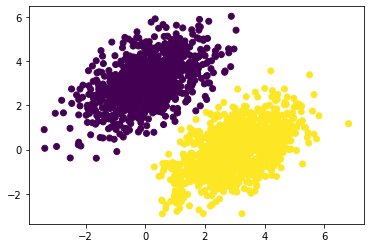

In [40]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:,1], c=predictions[:, 0] >0.5)
plt.show()


# prediction == [[w1], [w2] • [x,y] + b == w1*x + w2*y+ b]
# prediction 값이 <0.5 이면 클래스 0, >0.5 이면 클래스 1
# y = a*x + b  
# y = -w1/w2*x+(0.5-b)/w2

y = $ \frac{-w1*x+ (0.5-b)}{w2} $ <br>
w1x + w2y + b = 0.5 <br>

정리해보면 두 식이 같음이 성립된다

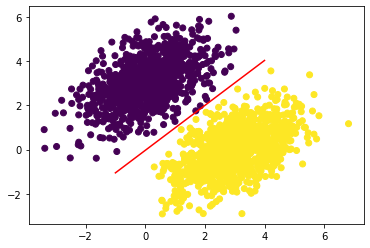

In [43]:
x = np.linspace(-1, 4, 100)  # 직선을 그리기 위해 -1~4 사이에 일정한 간격을 가진 100개의 숫자를 생성
y = -W[0]/W[1] * x + (0.5-b)/W[1]  # 사용할 직선의 방정식
plt.plot(x, y, "-r") # 가운데 빨간 직선을 그어줌
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:, 0]>0.5)  # 동일한 그래프에 모델의 예측을 나타냄
plt.show()

### 3.6 신경망의 구조: 핵심 Keras API 이해하기

#### 3.6.1 층: 딥러닝의 구성 요소

- 층(layer): 하나 이상의 텐서를 입력으로 받고 하나 이상의 텐서를 출력하는 데이터 처리 모듈, 어떤 종류의 층은 상태가 없지만 대부분의 경우 가중치(weight)라는 층의 상태를 가진다. <br>
- 밀집연결층(densely connected layer)로 처리함, 완전연결층(fully connected layer) or 밀집층(dense layer)라고도 부름 <br>
    - ex) (samples, timesteps, features) 크기의 Rank3 텐서에 저장된 시퀀스 데이터는 일반적으로 LSTM 같은 순환층(Recurrent Layer)이나 1D합성곱 (Conv1D)으로 처리 <br>
    - Rank4 Tensor에 저장된 이미지 데이터는 보통 2D합성곱층(Conv2D)으로 처리 <br>

#### 코드 3-22 Layer의 Subclass로 구현한 Dense층

In [45]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):   # 모든 keras층은 Layer class를 상속
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape):  # build() 메서드에서 가중치를 생성
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),  #  add _weight()는 가중치를 간편하게 만드는 메서드
                                initializer="random_normal")  
        # self.W = tf.Variable(tf.random.uniform(w_shape))와 같이 독립적으로 변수를 생성하고 층의 속성으로 할당 할 수도 있음
        self.b = self.add_weight(shape=(self.units),
                                initializer= "zeros")
    def call(self, inputs): # call() 메서드에서 정방향 패스 계산을 정의
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [46]:
# 클래스의 인서턴스를 생성하면 텐서플로 텐서를 입력을 받는 함수처럼 사용할 수 있음
my_dense = SimpleDense(units=32, activation = tf.nn.relu)  # 앞서 정의한 층의 인스턴스를 만듦
input_tensor = tf.ones(shape=(2, 784)) # test입력을 만듦
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### 자동 크기 추론: 동적으로 층 만들기

In [48]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')

In [49]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32)
])

# 이 모델에서의 층은 입력 크기에 대해 어떤 정보도 없음

In [ ]:
# 따라서 위 모델은 이상적이지 않음, 실행하게 되면 다음과 같은 모델이 만들어지게 되버림
model = NaiveSequential([
    NaiveDense(input_size=784, output_size = 32, activation="relu"),
    NaiveDense(input_size=32, output_size = 32, activation="relu"),
    NaiveDense(input_size=64, output_size = 32, activation="relu"),
    NaiveDense(input_size=32, output_size = 32, activation="softmax")
])

# 이게 왜 문제냐면, 출력을 만드는 층의 규칙이 복잡하며 문제는 더 심각해짐.
# ex, 층이 (batch, input_size*2 if input_size%2 == 0 else input_size*3)크기의 출력을 반환한다면?

In [58]:
def __call__(self, inputs):
    if not self.built:
        self.build(inputs.shape)
        self.built = True
    return self.call(inputs)

In [59]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

#### 3.6.2 층에서 모델로 

Sequential 모델은 단순치 층을 쌓은 것이고 하나의 입력을 하나의 출력에 mapping <br>
네트워크에 자주 등장하는 구조 <br>
- 2개의 가지(two-branch)를 가진 network <br>
- multihead network <br>
- residual network <br>
보통 서브클래스를 만들거나 API를 사용 <br><br>

모델 순서) <br>
모델의 구조는 가설공간(hypothesis space)를 정의 <br>
   <pre>↓ <br> </pre>
입력 데이터를 출력 데이터로 매핑하는 일련의 특정한 텐서 연산으로 제한 <br>
   <pre>↓ <br> </pre>
데이터에 대한 가정, 시작할때 모델이 가지게 될 사전 지식을 인코딩 <br>
   <pre>↓ <br> </pre>
원하는 결과를 얻을때까지 모델을 어떻게 조정할지 gogo

#### 3.6.3 '컴파일' 단계: 학습 과정 설정

모델 구조르 정의하고 난 후 다음 3가지를 더 선택 <br>
- 손실함수(loss function) = 목적함수(objective function): 훈련 과정에서 최소화할 값, 현재 작업에 대한 성공의 척도 <br>
- 옵티마이저(optimizer): 손실 함수를 기반으로 네트워크가 어떻게 업데이트 될지 결정, 특정 종류의 확류적 경사 하강법(SGD)로 구현 <br>
- 측정 지표(metric): 훈련과 검증 과정에서 모니터링할 성공의 척도 <br>

In [60]:
# ex) 보통 이렇게 생겨 먹음
model = keras.Sequential([keras.layers.Dense(1)]) # 선형 분류기를 정의
model.compile(optimizer = "rmsprop",  # 대, 소문자를 구분하지 않음 
             loss = "mean_squared_error", # 손실 이름을 평균 제곱 오차로 지정
             metrics=["accuracy"]) #측정 자료를 리스트로 지정, 여기에서는 정확도만 사용

# or 매개변수를 인스턴스 객체로 지정할 수도 있음
model.compile(optimizer = keras.optimizers.RMSprop(),
             loss = keras.losses.MeanSquaredError(),
             metrics = [keras.metrics.BinaryAccuracy()])

# model.compile(optimzer = keras.optimizers.RMSprop(learning_rate=1e-4),
#             loss = my_custom_loss,
#             metrics = [my_custom_metric_1, my_custom_metric_2])

<b>옵티마이저 Optimizer:</b> <br>
    - SGD (모멘텀 선택가능) <br>
    - RMSprop <br>
    - Adam <br>
    - Adagrad <br>
    - 그 외 <br><br>
    
<b>손실:</b> <br>
    - CategoricalCrossentropy: 여러개의 클래스가 있는 분류 문제에서는 범주형 분류 <br>
    - SparseCategoricalCrossentropy <br>
    - BinaryCrossentropy: for 이진분류 <br>
    - MeanSquaredError <br>
    - KLDivergence <br>
    - CosineSimilarity <br>
    - 그 외: 완전히 새로운 연구를 할때만 자신만의 손실 함수르 만들게 될것임 <br><br>

<b>측정 지표:</b> <br>
    - CategoricalAccuracy <br>
    - SparseCategoricalAccuracy <br>
    - BinaryAccuracy <br>
    - AUC <br>
    - Precision <br>
    - 그 외 <br>

#### 3.6.4 손실 함수 선택하기

서술어로 설명하기 귀찮으니 위에 설명을 달겠음

#### 3.6.5 fit() 메서드 이해하기

- 훈련할 데이터(입력과 타깃): Dataset 객체로 전달<br>
- 훈련할 에포크(epoch) 횟수: 전달한 데이터에서 훈련 루프를 몇 번이나 반복할지 알려줌 <br>
- 미니배치 경사 하강법의 각 에포크에서 사용할 배치 크기: 가중치 업데이트 단계에서 gradient를 계산하는데 사용될 훈련 샘플 개수<br>

#### 코드 3-23 넘파이 데이터로 fit() 메서드 호출하기

In [61]:
history = model.fit(
    inputs,  # 입력샘플(넘파이 배열)
    targets, # 훈련 타깃(넘파이 배열)
    epochs=5, # 이 데이터에서 훈련 뤂를 5번 반복
    batch_size = 128  # 훈련루프는 128개의 샘플 배치로 이 데이터를 순회
)

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 17.7592 - binary_accuracy: 0.5220
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 17.0750 - binary_accuracy: 0.5225
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 16.4974 - binary_accuracy: 0.5225
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 15.9432 - binary_accuracy: 0.5225
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 15.3956 - binary_accuracy: 0.5230


In [ ]:
history = model.fit(
    inputs,  #
    targets, #
    epochs=5, #
    batch_size = 128   #
)

In [62]:
history.history

{'loss': [17.759170532226562,
  17.074989318847656,
  16.4974422454834,
  15.943191528320312,
  15.395644187927246],
 'binary_accuracy': [0.5220000147819519,
  0.5224999785423279,
  0.5224999785423279,
  0.5224999785423279,
  0.5230000019073486]}

#### 3.6.6 검증 데이터에서 손실과 측정 지표 모니터링하기

머신러닝의 목표는 범용적으로 잘 작동하는 모델을 얻는 것! <br>
새로운 데이터에 모델이 어떻게 동작하는지 예상하기 위해 훈련 데이터의 일부를 검증데이터(validation data)로 떼어 놓는 것이 표준적인 방법 <br>

#### 코드 3-24 validation_data 매개변수 사용하기

In [65]:
model = keras.Sequential([keras.layers.Dense(1)])
# model = keras.Sequential([
#     SimpleDense(32, activation="relu"),
#     SimpleDense(64, activation="relu"),
#     SimpleDense(32, activation="relu"),
#     SimpleDense(10, activation="softmax")
# ])
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.1),
             loss = keras.losses.MeanSquaredError(),
             metrics=[keras.metrics.BinaryAccuracy()])


# 검증 데이터에 한 클래스의 샘플만 포함되는 것을 막기 위해 랜덤하게 생성한 인덱스를 사용해서 입력과 타깃을 섞는다.
indices_permutation = np.random.permutation(len(inputs))  
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

# 훈련 입력과 타깃의 30%를 검증용으로 떼어 놓는다. (검증 손실과 측정 지표 계산을 위해 훈련 데이터에서 이 샘플을 제외시켜 따로 보관)
num_validation_samples = int(0.3*len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,  # 훈련 데이터는 모델의 가중치를 업데이트하는데 사용됨
    training_targets, # 여기도
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)  # 검증데이터는 검증손실과 측정 지표를 모니터링하는데만 사용
    # 검증 데이터의 손실값은 검증손실이라고 부름.
)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 0.1331 - binary_accuracy: 0.9636 - val_loss: 0.0334 - val_binary_accuracy: 0.9883
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0689 - binary_accuracy: 0.9679 - val_loss: 0.1043 - val_binary_accuracy: 0.9667
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0753 - binary_accuracy: 0.9421 - val_loss: 0.0800 - val_binary_accuracy: 0.9350
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0701 - binary_accuracy: 0.9629 - val_loss: 0.1219 - val_binary_accuracy: 0.9150
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0747 - binary_accuracy: 0.9557 - val_loss: 0.0330 - val_binary_accuracy: 0.9883


#### 3.6.7 추론: 훈련한 모델 사용하기

추론(inference): 모델을 훈련하고 나면 이 모델을 사용하여 새로운 데이터에서 예측을 만들게 됨 

In [66]:
# predictions = model(new_inputs)  # 넘파이 배열이나 tensorflow 텐서를 받고 텐서플로 텐서를 반환합니다.
# predictions = model.predict(new_inputs, batch_size = 128) # Numpy 배열이나 Dataset 객체를 받고 넘파이 배열을 반환
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[0.40360206]
 [1.0008351 ]
 [0.88761955]
 [1.100294  ]
 [0.25899673]
 [0.22082275]
 [0.43225223]
 [0.2742893 ]
 [0.18339625]
 [0.9437031 ]]


### 3.7 요약


- tensorflow의 핵심 객체는 텐서, 변수, 텐서 연산, gradientTape <br>
- kears의 핵심 클래스는 Layer, 층은 가중치와 연산을 캡슐화, 이런 층을 조합하여 모델을 만듦 <br>
- 모델을 룬련하기 전에 optimizer, loss, 측정 지표를 선택하여 model.compile() 메서드에 지정 <br>
- 미니 배치 경사 하강법을 실행하는 fit() 메서드로 모델을 훈련할 수 있음 <br>
- 모델을 훈련하고 나면 model.predcit() 메서드를 사용하여 새로운 입력에 대한 예측을 만듦 <br>